In [56]:
# Data Science, Artificial Intelligence, Machine Learning, Clearly Explained.
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_blobs

# good tool to make meaningful data :) with sample size, y-centers, x-features & random_state
X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=7)

In [57]:
X

array([[-8.51922024,  4.14769715],
       [-3.29623017,  3.80714422],
       [-7.45617621,  6.19887436],
       [-0.84869352,  6.71689861],
       [ 0.68020349,  4.7066054 ],
       [-0.96240374,  3.94469894],
       [-0.66375348,  3.71646636],
       [-9.26275724,  5.60044142],
       [-0.39108213,  4.28931716],
       [-1.36419257,  4.15982722],
       [-8.19937429,  4.07185131],
       [-7.42443766,  5.18190153],
       [-8.4747246 ,  3.84365154],
       [-2.66677884,  4.97092768],
       [-9.21638774,  6.67084598],
       [-1.13038139,  4.72188129],
       [-8.44101405,  6.00589213],
       [ 0.53434551,  4.1398898 ],
       [-6.82313452,  5.75271138],
       [-9.09926319,  5.42682758],
       [-7.96853484,  5.33701943],
       [-2.88289096,  5.00473291],
       [-8.86097416,  7.62744807],
       [-2.43603522,  5.93127918],
       [-7.9192539 ,  5.72225675],
       [-8.87906207,  3.31006074],
       [-1.32659082,  5.66238948],
       [-1.60063384,  2.56293368],
       [-2.94015457,

In [58]:
y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0])

array([0, 1])

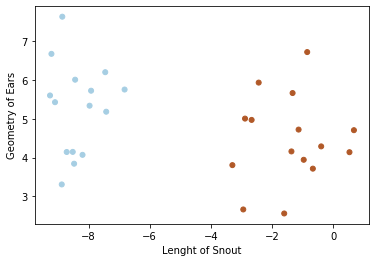

In [59]:
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap=plt.cm.Paired)

# How would you teach a 5 year old to differentiate a dog from a cat? 
# well! then you should not explain SVM model, but of course you can teach 
# the principles behind the SVM model - dogs has longer Snout whereas cats have sharp ears.

plt.ylabel('Geometry of Ears')
plt.xlabel('Lenght of Snout')

# Now lets predict if its a dog or cat with ear shape and Snout length.
testData = [[-8,7],[-1,5]]
svm_model.predict(testData)

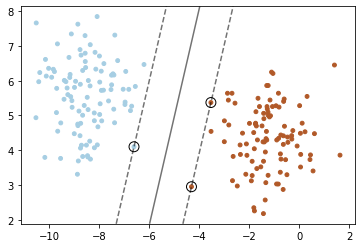

In [60]:
# Now lets open the hood and see inside the SVM Model
X, y = make_blobs(n_samples=200, centers=2, random_state=7)

svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap=plt.cm.Paired)

# plot the decision function with get current axes (both x & y axis)
axes = plt.gca()
xLimit = axes.get_xlim()
yLimit = axes.get_ylim()

# create grid to evaluate model
xUnit = np.linspace(xLimit[0], xLimit[1], 13)
yUnit = np.linspace(yLimit[0], yLimit[1], 13)
yGrid, xGrid = np.meshgrid(yUnit, xUnit)
xyArray = np.vstack([xGrid.ravel(), yGrid.ravel()]).T
Z = svm_model.decision_function(xyArray).reshape(xGrid.shape)

# Linear Hyperplane with level=0, solid straight lines and Margins with dotted lines, levels= +1 or -1.
axes.contour(xGrid, yGrid, Z, colors='k', levels=[-1, 0, 1], alpha=0.55, linestyles=['--', '-', '--'])

# plot support vectors(data points) on margin lines, D+ plus D- is margin distance.
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=99, linewidth=1, facecolors='none', edgecolors='k')
plt.show()